<a href="https://colab.research.google.com/github/lcalderon-aceituno24/Half_Life_Experiment/blob/main/Half_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Ba-137m Decay
Lydia Calderon-Aceituno | December 1, 2020

Determining the half-life of Ba-137m 


# Equipment 
* LoggerPro software
* Radiation Monitor (Vernier)
* LabPro (Vernier) 
* Cs-137/Ba-137m minigenerator 
* Lead bricks 
* Ring stand and clamp

In [2]:
#Python commands to load libraries with special functions for importing data, plotting, and numerical processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as sciConst

In [3]:
backgroundCountRate = 18.1 #radcounts/minute

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/My Drive/PS 251L/lcalderon-aceituno24/Half Life/"

In [6]:
df = pd.read_csv(path + 'RadiationCounts_lcalderon-aceituno.csv', sep=",")

Here we see a few sample values of the time v.s. radiation counts data:

In [7]:
df.head()

,Latest: Time (min),Latest: Radiation (Counts)
0,0.25,1589
1,0.50,1469
2,0.75,1289
3,1.00,1318
4,1.25,1205


For clarity, we re-name the column titles:

In [8]:
df.rename(columns = {'Latest: Time (min)':'t (min)','Latest: Radiation (Counts)':'Counts'},inplace=True);
df.head()

,t (min),Counts
0,0.25,1589
1,0.50,1469
2,0.75,1289
3,1.00,1318
4,1.25,1205


In [9]:
# Uncertainty calculations
df['Count uncertainty']=2*np.sqrt(df['Counts']); # errror in counts with 95% CI
df.head()


,t (min),Counts,Count uncertainty
0,0.25,1589,79.724526
1,0.50,1469,76.655072
2,0.75,1289,71.805292
3,1.00,1318,72.608539
4,1.25,1205,69.426220


In [10]:
df['Counts']=df['Counts']-backgroundCountRate/4;

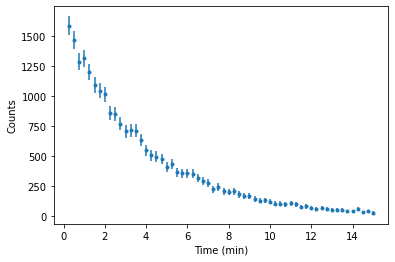

In [11]:
# plot 
fig1, ax1=plt.subplots()
ax1.errorbar(df['t (min)'],df['Counts'],df['Count uncertainty'],fmt=".")
ax1.set_xlabel("Time (min)")
ax1.set_ylabel("Counts");

In [12]:
## equation for ln(counts)
df['Log counts']=np.log(df['Counts']);

For a function$f(x)$, if the uncertainty in $x$ is represented by $\delta x$, then the uncertainty in $f(x)$ is 

$\delta f=\frac{df}{dx}\delta x$

In our case, since $f(x)=\mathrm{ln}x$, $\delta f= \frac{\delta x}{x}$

In [13]:
df['Log counts uncertainty']=df['Count uncertainty']/df['Counts']

In [14]:
# updated DataFrame
df.head()

,t (min),Counts,Count uncertainty,Log counts,Log counts uncertainty
0,0.25,1584.475,79.724526,7.368008,0.050316
1,0.50,1464.475,76.655072,7.289252,0.052343
2,0.75,1284.475,71.805292,7.158105,0.055902
3,1.00,1313.475,72.608539,7.180432,0.055280
4,1.25,1200.475,69.426220,7.090473,0.057832


In [15]:
#Best fit line to graph to ln counts vs t using polyfit 
fitPoly, fitCov = np.polyfit(df['t (min)'], df['Log counts'], 1, w=1/df['Log counts uncertainty'], cov=True)
fitErrors = 2*np.sqrt(np.diagonal(fitCov))
fitFunc = np.poly1d(fitPoly)
print(fitPoly)
print(fitErrors)

[-0.26217677  7.40535599]
[0.00421464 0.02004874]


In [16]:
decayConst = fitPoly[0]
dDecayConst= fitErrors[0]
halflife = np.log(2)/decayConst;
dhalflife = dDecayConst/halflife;
print(halflife,dhalflife);

-2.6438161822320962 -0.0015941514030733284


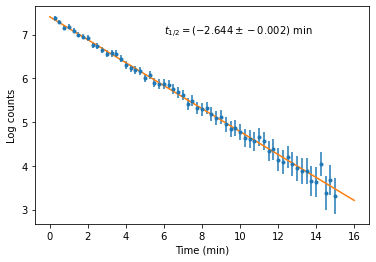

In [17]:
# plot uncertainty
fig2, ax2=plt.subplots()
ax2.errorbar(df['t (min)'],df['Log counts'],df['Log counts uncertainty'],fmt=".")
ax2.set_xlabel("Time (min)")
ax2.set_ylabel("Log counts");

#best fit line
t_fit = np.linspace(0,16,3);
ax2.plot(t_fit, fitFunc(t_fit));

# best fit data display
fitInfo = r"$t_{1/2}=(%.3f\pm%.3f)\ \mathrm{min}$" % (halflife, dhalflife)
ax2.text(6,7,fitInfo);


In [18]:
# calculate percent error 
percenterror = abs(((abs(halflife) - 2.552)/2.552))*100
print (percenterror)
print (abs(halflife))

3.5978127833893496
2.6438161822320962


The half life of Ba-137m was calculated to be $2.64$ minutes, with a percent error of $3.60\%$ when compared to the literature value. 